# Importing libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [52]:
data = pd.read_csv("data.csv")

# Data profiling 

In [53]:
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,320,$90,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,431,$138,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,754,$279,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,294,$123,Outlet


In [54]:
data.shape

(9648, 12)

In [55]:
data.describe()

,Retailer ID
count,9.648000e+03
mean,1.173850e+06
std,2.636038e+04
min,1.128299e+06
25%,1.185732e+06
50%,1.185732e+06
75%,1.185732e+06
max,1.197831e+06


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9641 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9646 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Sales Method      9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


# Data Cleaning

In [57]:
data["Total Sales"] = data["Total Sales"].str.replace(",","")

In [58]:
data["Total Sales"] = data["Total Sales"].astype("int")

In [59]:
data["Operating Profit"] = data["Operating Profit"].str.replace(",", "").str.replace("$","")

In [60]:
data["Operating Profit"] = data["Operating Profit"].astype("int")

In [61]:
data["Price per Unit"] = data["Price per Unit"].str.replace(",", "").str.replace("$","")

In [62]:
data["Price per Unit"] = data["Price per Unit"].astype("float")

In [63]:
data["Units Sold"] = data["Units Sold"].str.replace(",","")

In [64]:
data["Units Sold"] = data["Units Sold"].astype("int")

In [65]:
data["Invoice Date"] = pd.to_datetime(data["Invoice Date"])

In [66]:
data["Invoice Date"]

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
9643   2021-01-24
9644   2021-01-24
9645   2021-02-22
9646   2021-02-22
9647   2021-02-22
Name: Invoice Date, Length: 9648, dtype: datetime64[ns]

In [67]:
data["Month"] = data["Invoice Date"].dt.month

In [68]:
data["Year"] = data["Invoice Date"].dt.year

In [69]:
data.drop("Retailer ID",axis = 1 , inplace = True)

In [70]:
data.isnull().sum()

Retailer            0
Invoice Date        0
Region              7
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [71]:
data["Price per Unit"] = data["Price per Unit"].fillna(value = data["Price per Unit"].mean())

In [72]:
data.isnull().sum()

Retailer            0
Invoice Date        0
Region              7
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [73]:
data.Region = data.Region.fillna(value ="NA")

In [74]:
data.isnull().sum()

Retailer            0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [75]:
data.pivot_table( index = "Product" ,values ="Total Sales" , aggfunc = ["sum","mean","min","max"])

,sum,mean,min,max
,Total Sales,Total Sales,Total Sales,Total Sales
Product,,,,
Men's Apparel,12318905,7675.330218,25,61750
Men's Athletic Footwear,15367410,9544.975155,74,71250
Men's Street Footwear,20882669,12970.601863,157,81000
Men's aparel,54000,54000.000000,54000,54000
Women's Apparel,17903910,11134.272388,91,82500
Women's Athletic Footwear,10663235,6639.623288,0,54000
Women's Street Footwear,12800313,7960.393657,37,66500


In [76]:
data.pivot_table( index = "Sales Method" ,values ="Total Sales" , aggfunc = ["sum","mean","min","max"])

,sum,mean,min,max
,Total Sales,Total Sales,Total Sales,Total Sales
Sales Method,,,,
In-store,35664375,20496.767241,750,82500
Online,24767439,5065.951933,0,82500
Outlet,29558628,9790.867175,0,78000


<function matplotlib.pyplot.show(close=None, block=None)>

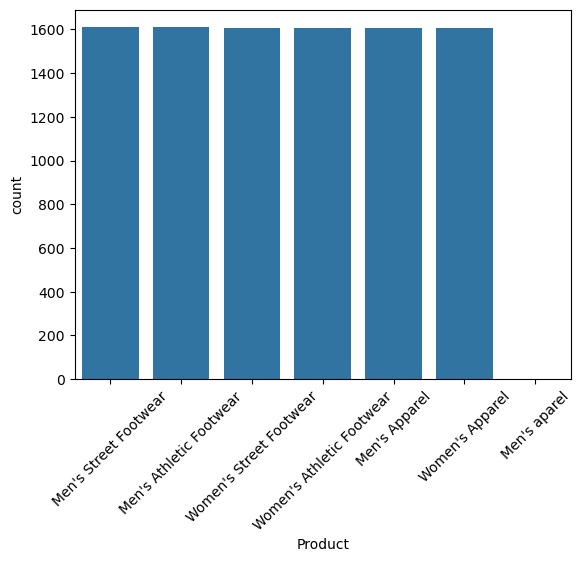

In [77]:
plt.xticks(rotation=45)
sns.countplot(data = data , x = "Product")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

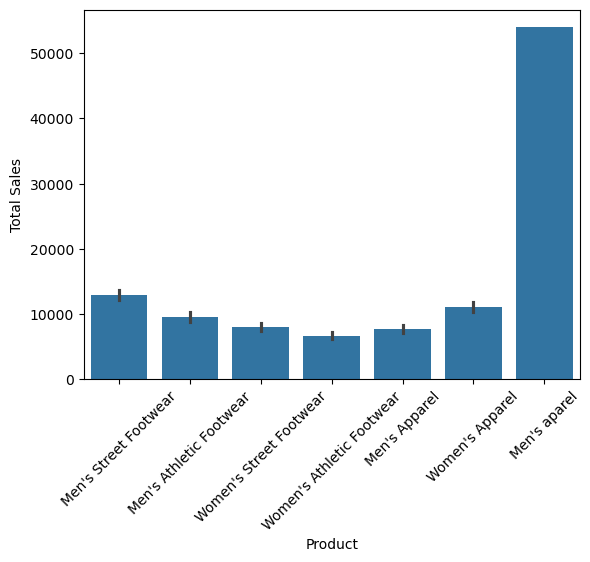

In [78]:
plt.xticks(rotation=45)
sns.barplot(data = data , x = "Product", y ="Total Sales")
plt.show


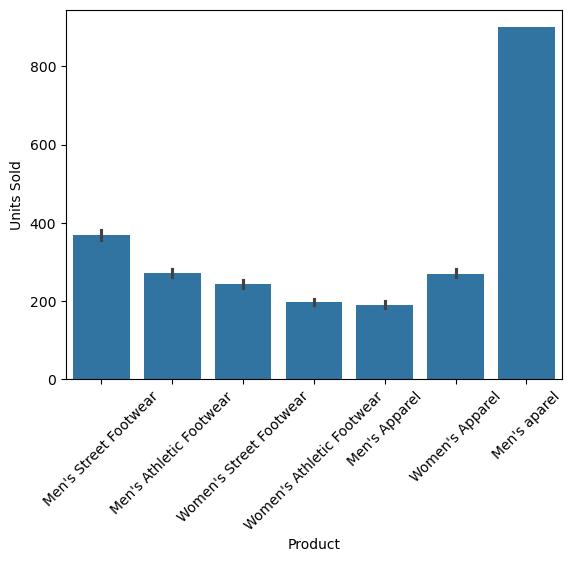

In [79]:
plt.xticks(rotation=45)
sns.barplot(data = data , x = "Product", y ="Units Sold")
plt.show()


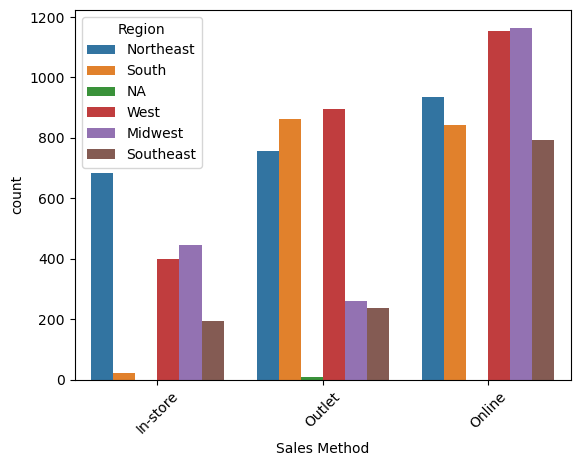

In [80]:
plt.xticks(rotation=45)
sns.countplot(data = data , x = "Sales Method", hue = "Region")
plt.show()


<Axes: xlabel='Region', ylabel='Total Sales'>

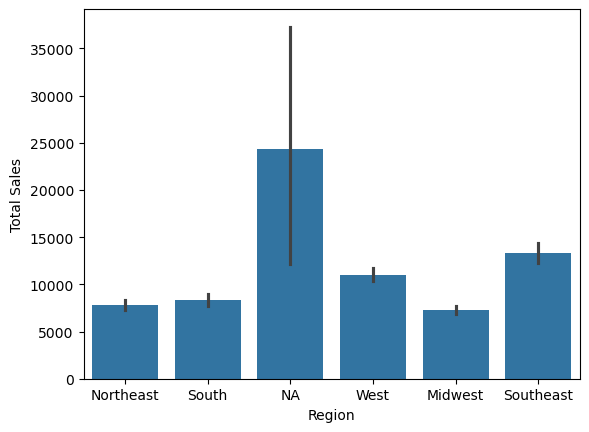

In [81]:
sns.barplot(data = data , x = 'Region' , y = "Total Sales")

<function matplotlib.pyplot.show(close=None, block=None)>

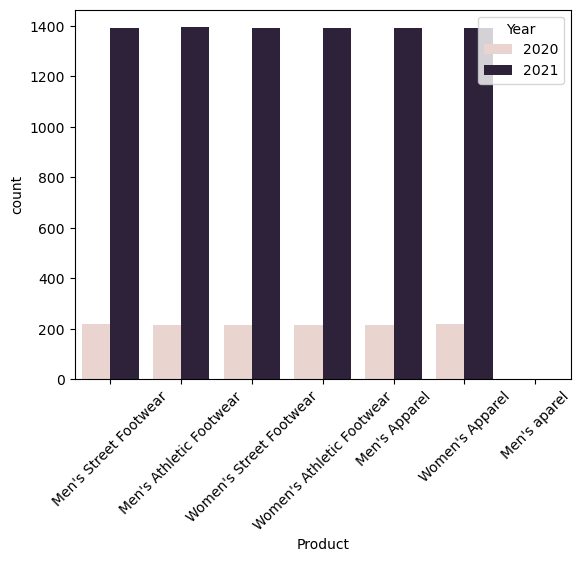

In [82]:
plt.xticks(rotation=45)
sns.countplot(data = data , x = "Product" , hue= "Year")
plt.show


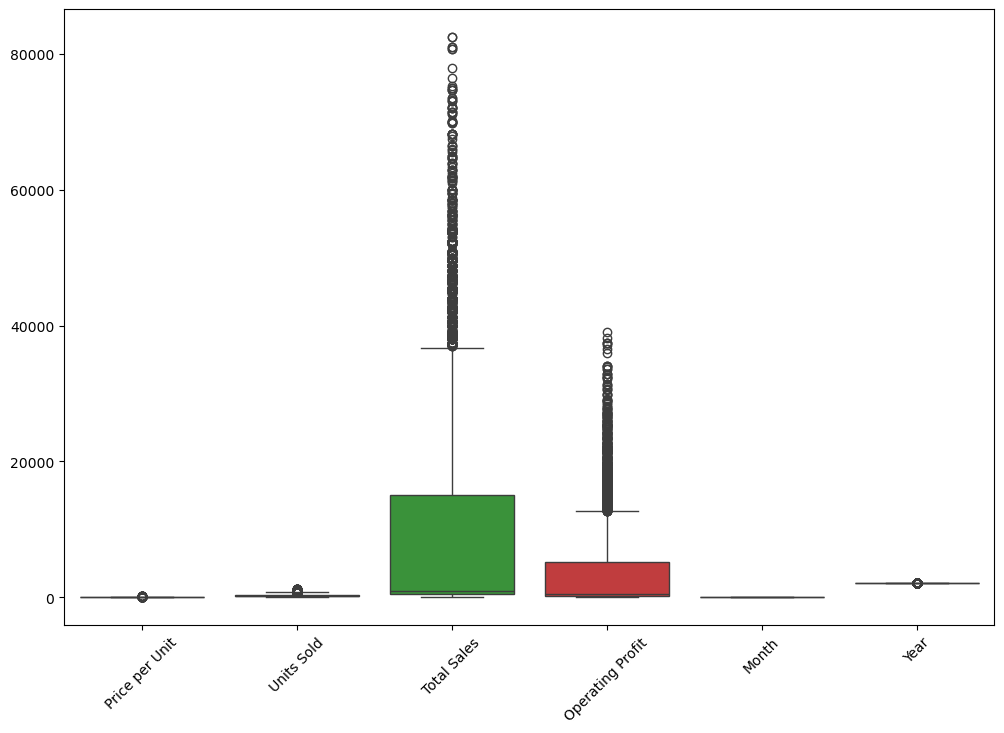

In [83]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 45)
sns.boxplot(data = data)
plt.show()

<Axes: xlabel='Product', ylabel='count'>

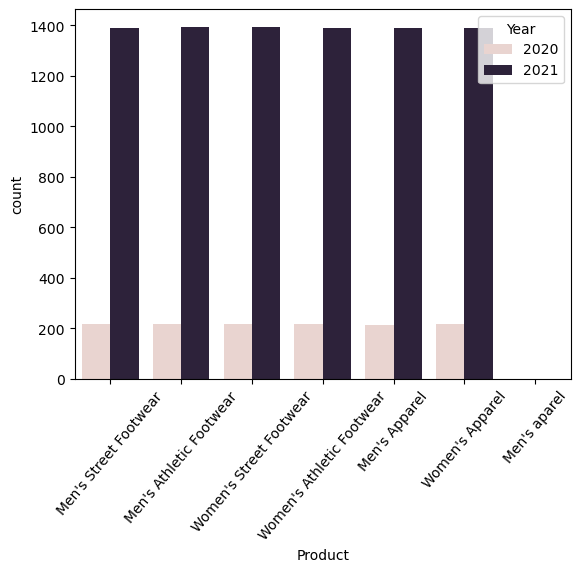

In [84]:
plt.xticks(rotation = 50)
sns.countplot(data = data , x = "Product" , hue = "Year")

<Axes: xlabel='Product', ylabel='Total Sales'>

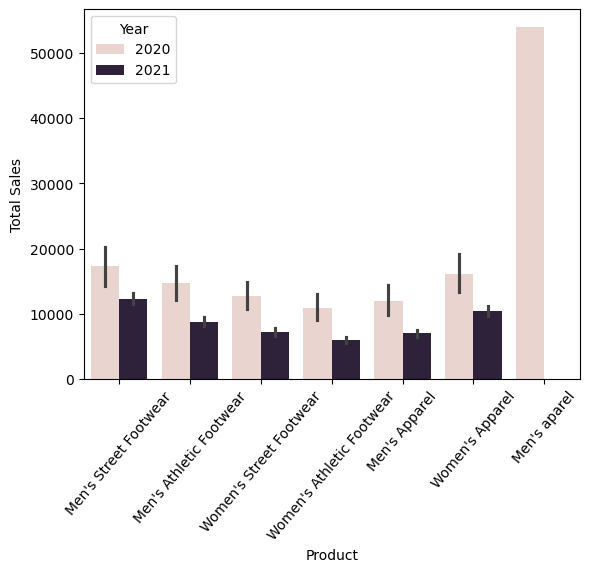

In [85]:
plt.xticks(rotation = 50)
sns.barplot(data = data , x = "Product" , y = "Total Sales" , hue = "Year")

<Axes: title={'center': 'Sales over Year'}, xlabel='Year', ylabel='Total Sales'>

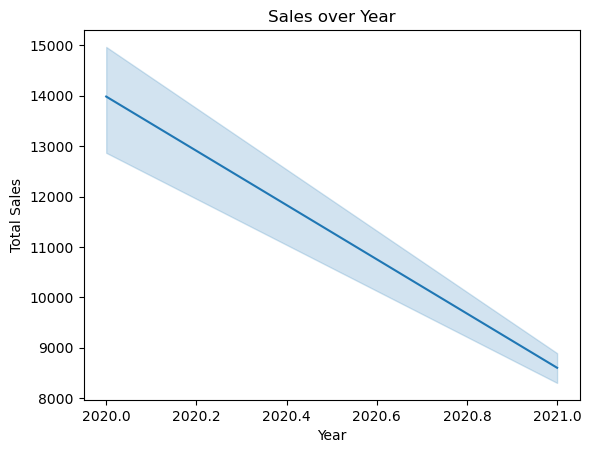

In [86]:
plt.title("Sales over Year")
sns.lineplot(data = data , y = "Total Sales" , x = "Year")

<Axes: title={'center': 'Sales over Month'}, xlabel='Month', ylabel='Total Sales'>

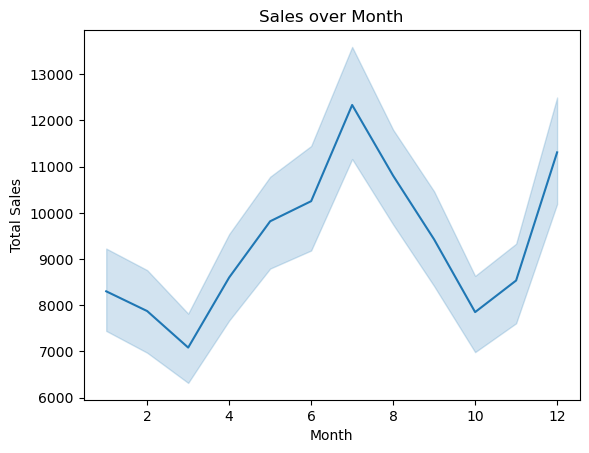

In [87]:
plt.title("Sales over Month")
sns.lineplot(data = data , y = "Total Sales" , x = "Month")

<Axes: title={'center': 'Sales over Month'}, xlabel='Month', ylabel='Total Sales'>

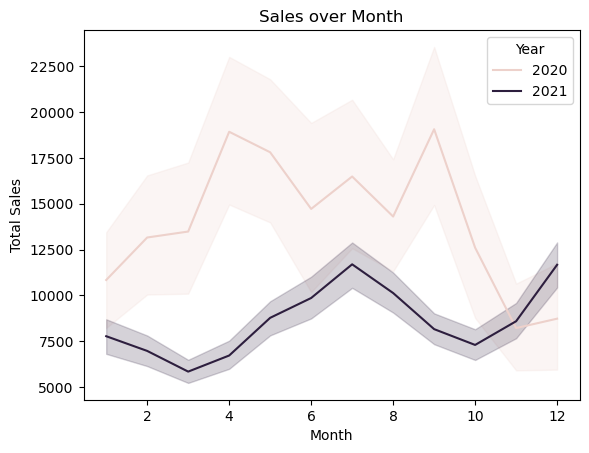

In [45]:
plt.title("Sales over Month")
sns.lineplot(data = data , y = "Total Sales" , x = "Month" , hue = "Year")

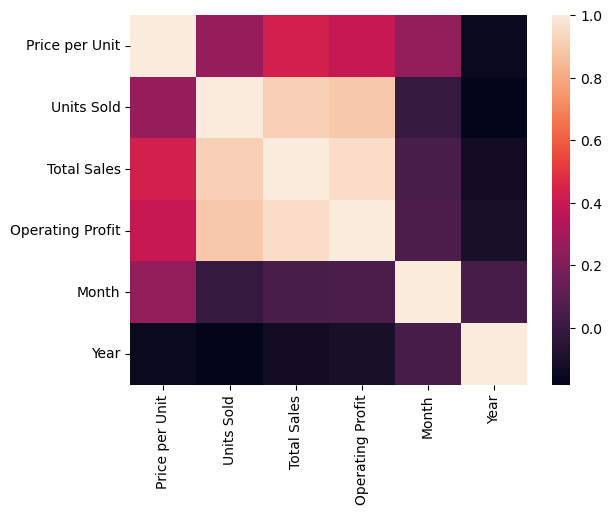

In [88]:
plt.xticks(rotation=50)
sns.heatmap(data.select_dtypes(include=['number']).corr())
plt.show()


<Axes: xlabel='Total Sales', ylabel='Price per Unit'>

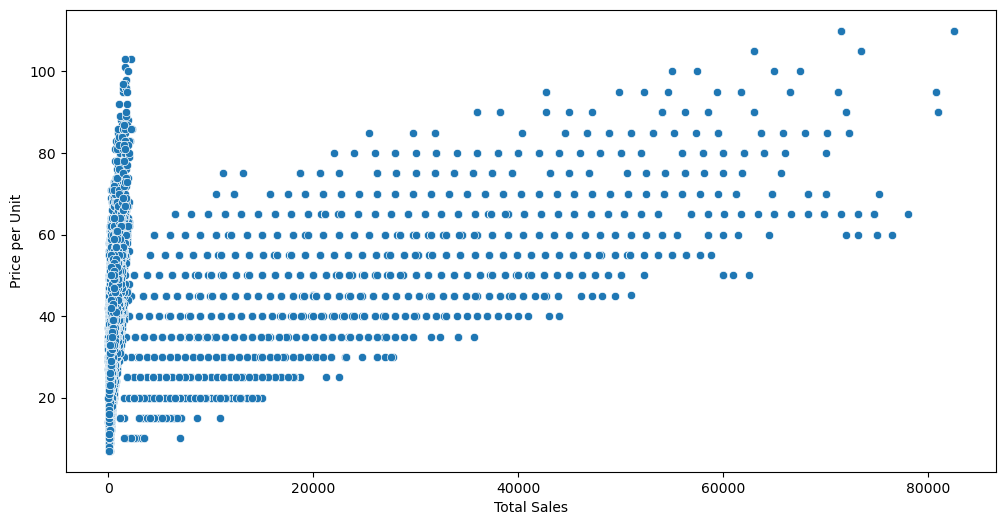

In [93]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data , x = "Total Sales" , y = "Price per Unit")

<Axes: xlabel='Total Sales', ylabel='Units Sold'>

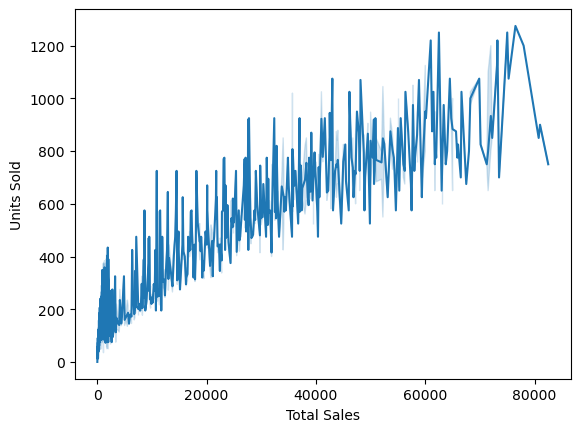

In [95]:
sns.lineplot(data = data , x ="Total Sales" , y = "Units Sold")

<Axes: xlabel='Total Sales', ylabel='Operating Profit'>

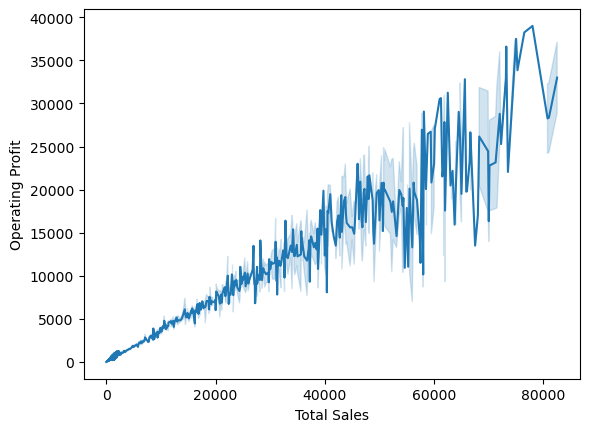

In [96]:
sns.lineplot(data = data , x ="Total Sales" , y = "Operating Profit")